# Notebook 5: Simulation with Conditional and Total Probability Solutions
***

In this notebook we'll get some more practice with conditional probabilities, total probability, and the product rule.  We'll also see how we can do some simple random simulations using Numpy to verify our results. 

We'll need Numpy for this notebook, so let's load it.  You might also want to use Pandas too, so we'll load that one too.

In [1]:
import numpy as np 
import pandas as pd

### Example - Estimating the Probability of Drawing Balls from Boxes
***
S’pose we have two boxes filled with green and red balls.  Box 1 contains 2 green balls and 7 red balls.  Box 2 contains 4 green balls and 3 red balls. Paul selects a ball by first choosing one of the two boxes at random. He then selects one of the balls in this box at random. $\color{blue}{\text{What is the probability Paul has selected a red ball, if it is twice as likely for Paul to pick from Box 1 as it is Box 2?}}$

The following code runs a simple simulation to estimate the probability of drawing a ball of a particular color.  Run the code and verify that it agrees with the by-hand computation.

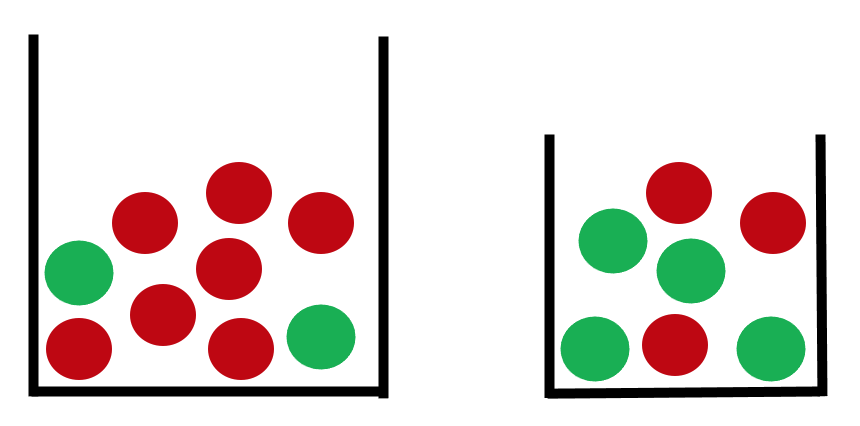 

In [2]:
box1 = {'balls' : np.array(["green", "red"]), 'probs' : np.array([2/9, 7/9])}
box2 = {'balls' : np.array(["green", "red"]), 'probs' : np.array([4/7, 3/7])}
box_choices = {'boxes' : np.array([box1, box2]), 'probs' : np.array([2/3, 1/3])}

def sample_ball(box_choices):
    # randomly choose a box
    box = np.random.choice(box_choices['boxes'], p = box_choices['probs'])
    # randomly choose a ball from that box
    return np.random.choice(box['balls'], p = box['probs'])
      # returns a colored ball

def probability_of_color(color, box_choices, num_samples=1000):
    # get a bunch of balls
    balls = np.array([sample_ball(box_choices) for ii in range(num_samples)])
    # compute fraction of balls of desired color 
    return np.sum(balls == color) / num_samples
      # returns the total number of red balls in the sample

In [3]:
probability_of_color("red", box_choices, num_samples=50000)

0.66154

### Exercise 1 - More Colors! 
*** 

Suppose now we add a third color to the mix.  Box 1 now contains 2 green balls, 7 red balls, and 5 purple balls.  Box 2 now contains 4 green balls, 3 red balls, and 5 purple balls.  The probability of grabbing the first box is still twice the probability of grabbing the second box.  

**Part A**: What is the probability of drawing a purple ball?  Try working this out by hand.

***
**Solution**: 

Let $p$ be the event that we select a purple ball, and $B_1$ and $B_2$ be the events that we select Box 1 and Box 2, respectively.  We then have 

$$
P(p) = P(p \mid B_1)~P(B_1) + P(p \mid B_2)~P(B_2) = \frac{5}{14}\cdot\frac{2}{3} + \frac{5}{12}\cdot\frac{1}{3} = \frac{10}{42} + \frac{5}{36} \approx 0.377
$$
***

**Part B**: Next, copy and paste the code from the example above and modify it to estimate the probability that you just computed and check your work. 

In [4]:
box1 = {'balls' : np.array(["green", "red", "purple"]), 'probs' : np.array([2/14, 7/14, 5/14])}
box2 = {'balls' : np.array(["green", "red", "purple"]), 'probs' : np.array([4/12, 3/12, 5/12])}
box_choices = {'boxes' : np.array([box1, box2]), 'probs' : np.array([2/3, 1/3])}

def sample_ball(box_choices):
    # randomly choose a box
    box = np.random.choice(box_choices['boxes'], p = box_choices['probs'])
    # randomly choose a ball from that box
    return np.random.choice(box['balls'], p = box['probs'])

def probability_of_color(color, box_choices, num_samples=1000):
    # get a bunch of balls
    balls = np.array([sample_ball(box_choices) for ii in range(num_samples)])
    # compute fraction of balls of desired color 
    return np.sum(balls == color) / num_samples

In [5]:
probability_of_color("purple", box_choices, num_samples=100000)

0.37823

Looks pretty darn close to 0.377 to me! Hooray!

### Exercise 2 - Estimating Conditional Probabilities 
***

Suppose you roll a fair die two times.

$A$ is the event "the sum of the throws equals $4$"

$B$ is the event "at least one of the throws is a $3$"

**Part A**: Compute (by hand) the probability that the sum of the throws equals 4 _given_ that at least one of the throws is a 3.  That is, compute $P(A \mid B)$. 

***
**Solution**: We want to compute 

$$
P(A \mid B) = \dfrac{P(A \cap B)}{P(B)}
$$

The intersection of the two events is the set $A \cap B = \{(3,1), (1,3)\}$.  Each possible roll combination occurs with probability $\frac{1}{6}\cdot\frac{1}{6} = \frac{1}{36}$. Summing over the possible outcomes gives 

$$
P(A \cap B) = \frac{1}{36} + \frac{1}{36} = \frac{1}{18}
$$

The probability of at least one of the throws being a $3$ can be computed in a number of ways.  Let $E_1$ be the event that we roll a 3 on the first die and $E_2$ be the event that we roll a 3 on the second die. Notice that $E_1$ and $E_2$ are not disjoint because we could roll a 3 on _both_ dice.  So we have 

$$
P(B) = P(E_1 \cup E_2) = P(E_1) + P(E_2) - P(E_1 \cap E_2) = \frac{1}{6} + \frac{1}{6} - \frac{1}{6}\cdot\frac{1}{6} = \frac{11}{36}
$$

Plugging this into the definition of conditional probability gives 

$$
P(A \mid B) = \dfrac{P(A \cap B)}{P(B)} = \frac{1/18}{11/36} = \frac{2}{11} = 0.\overline{18}
$$

***

**Part B**: Let's see if we can write a simple simulation to confirm our result.  The following code runs a simulation to estimate $P(A)$, i.e. the probability that if you roll a fair six-sided die twice the result will sum to 4.  Your job is to modify the code so that it estimates the conditional probability $P(A \mid B)$. **Hint**: Think about the definition of conditional probability.

*Hint:  the Numpy methods `logical_or` and `logical_and` are potentially useful.*

In [6]:
die = np.array([1,2,3,4,5,6])

num_samples = 100000
roll1 = np.random.choice(die, size=num_samples)
roll2 = np.random.choice(die, size=num_samples)
sum_to_four = (roll1 + roll2) == 4
sum_to_four_prob = np.sum(sum_to_four)/num_samples
print("The probability of rolling a sum-to-four is approximately {:.3f}".format(sum_to_four_prob))

The probability of rolling a sum-to-four is approximately 0.082


In [7]:
die = np.array([1,2,3,4,5,6])

num_samples = 100000
roll1 = np.random.choice(die, size=num_samples)
roll2 = np.random.choice(die, size=num_samples)
#print(roll1)
#print(roll2)
sum_to_four = (roll1 + roll2) == 4
at_least_one_three = np.logical_or(roll1==3, roll2==3)
#print(at_least_one_three)
four_and_three = np.logical_and(at_least_one_three, sum_to_four)
four_given_three_prob = np.sum(four_and_three)/np.sum(at_least_one_three)
print("The probability of rolling a sum-to-four given at least one 3 is approximately {:.3f}".format(four_given_three_prob))

The probability of rolling a sum-to-four given at least one 3 is approximately 0.182


This looks very close to $\dfrac{2}{11} \approx 0.\overline{18}$!  Neat.

### Exercise 3 - The Ol' Marble Switcharoo
***
A marble is drawn at random from a bag containing one black and one white marble.  If the white marble is drawn it is put back into the bag.  If the black marble is drawn, it is returned to the bag along with two **more** black marbles.  Then a second draw is made. What is the probability a black marble was drawn on **both** the first and the second draws?

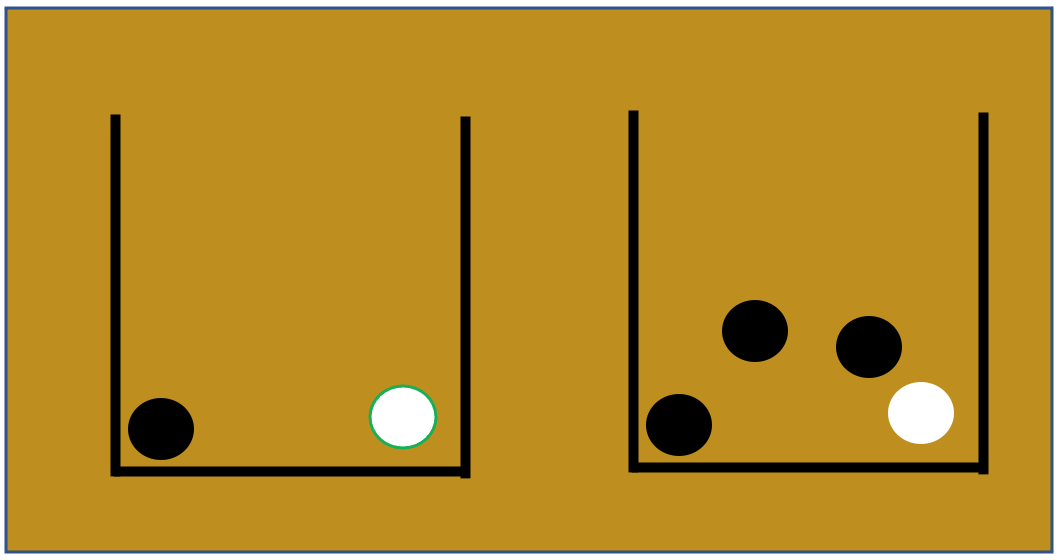 

**Part A**: Let's do this one in reverse order.  First, see if you can write a simple simulation to estimate this probability. 

In [9]:
marbles = np.array(["black", "white"])

num_samples = 100000

# draw the first marble 
m1 = np.random.choice(marbles, size=num_samples)

# do the sampling as an .apply() to df of first marble draws
df = pd.DataFrame({"m1" : m1})
  # df contains 10000 random selections of 'black' or 'white'
# we now need a function to apply, that draws a second marble based on result of the first one

def draw_second(row, some_set):
    return np.random.choice(some_set) if row[0]=="white" else np.random.choice(some_set, p=[3/4, 1/4])

# actually apply the function
df["m2"] = df.apply(draw_second, axis=1, some_set=marbles)
#print(df)
# compute ratio of double-black to number of samples total
both_black_prob = len(df.loc[(df["m1"]=="black") & (df["m2"]=="black")])/num_samples
print("The probability that both marbles are black is approximately {:.3f}".format(both_black_prob))

The probability that both marbles are black is approximately 0.373


**Part B**: Now carry out the computation by hand and see if they agree. 

**Solution**: Let $B_1$ be the event that a black marble is drawn first and $B_2$ be the event that a black marble is drawn second.  We want to compute $P(B_1 \cap B_2)$.  We'll do this using the product rule 

$$
P(B_1 \cap B_2) = P(B_2 \mid B_1)~P(B_1) 
$$

Now, clearly the probability of a black marble being drawn first is $P(B_1) = \frac{1}{2}$.  The conditional probability that a black marble is drawn second _given_ that a black marble was drawn first is $P(B_2 \mid B_1) = \frac{3}{4}$. 

Then the probability of both marbles being black is 

$$
P(B_1 \cap B_2) = P(B_2 \mid B_1) ~ P(B_1) = \frac{3}{4}\cdot\frac{1}{2} = \frac{3}{8} = 0.375
$$

which seems to agree very well with our simulation!

### Exercise 4 - Outcomes and Set Operations
***
Suppose we run an experiment we toss a coin 3 times.  The sample space for this experiment is 

$$
\Omega = \{HHH, ~ THH, ~HTH, ~HHT, ~TTH, ~THT, ~HTT, ~TTT\}
$$

**Part A**: Write down the set of outcomes corresponding to each of the following: 
1. $A$: "we throw tails exactly two times"
2. $B$: "we throw tails at least two times"
3. $C$: "tails did not appear _before_ a head appeared" 
4. $D$: "the first throw results in tails" 


***
**Solution**: We have 

1. $A = \{HTT, ~THT, ~TTH \}$
2. $B = \{HTT, ~THT, ~TTH, ~TTT \}$
3. $C = \{HHH, ~HHT, ~HTT, ~HTH\}$ 
4. $D = \{TTT, ~THT, ~THH, ~TTH\}$
***

**Part B**: Write down the set of outcomes corresponding to each of the following events: 
1. $A^c$ 
2. $A \cup (C \cap D)$
3. $A \cap D^{~c}$

***
**Solution**: 

1. $A^c = \{HHH, ~THH, ~HTH, ~HHT, ~TTT\}$ 
2. $A \cup (C \cap D) = A \cup \varnothing =  \{HTT, ~THT, ~,TTH \}$
3. $A \cap D^{~c} =  \{HTT\}$

***

**Part C**: Finally, Let $E$ be the event that $A$ or $C$ occurs, but not both.  Express $E$ in terms of $A$ and $C$, using only the basic set operations "union", "intersection", and "complement".  Then list the set of outcomes from the experiment that are included in $E$. 

***
**Solution**: We want things that are in $A \cup C$ but not things that are in $A \cap C$.  Things that are not in $A \cap C$ are in it's complement, namely $(A \cap C)^c$.  So if we want things that are in $A \cup C$ **and** $(A \cap C)^c$ we want to take the intersection.  So we have 

$$
E = (A \cup C) \cap (A \cap C)^c = \{HHH, ~HHT, ~HTH\}
$$

***